In [2]:
!pip install opencv-python

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
print(cv2.getVersionString())  # 설치 확인
print(cv2.__version__)


4.5.1
4.5.1


### 웹캠 실행 및 영상 받아오기

In [5]:
import cv2
capture=cv2.VideoCapture(0)
capture.set(cv2.CAP_PROP_FRAME_WIDTH,640)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT,480)

while True:
    ret,frame=capture.read()
    cv2.imshow("VideoFrame",frame)
    if cv2.waitKey(1)>0:
        break
capture.release()
cv2.destroyAllWindows()#모든 윈도우 창 닫기

### 정지 영상(이미지)출력


In [32]:
img=cv2.imread('data/image2.jpg',cv2.IMREAD_UNCHANGED)
height,width,channel=img.shape
print(height,width,channel)
if height>=800 or width>=800:
    #cv2.IMREAD_REDUCED_COLOR_줄일 크기(1/줄일 크기 로 줄어든다)
    img=cv2.imread('data/image2.jpg',cv2.IMREAD_REDUCED_COLOR_4)
elif height>=600 or width>=600:
    img=cv2.imread('data/image2.jpg',cv2.IMREAD_REDUCED_COLOR_2)

    
cv2.imshow('Background',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('data/image2_조정.jpg',img) #데이터 저장

1729 1200 3


True

In [38]:
img=cv2.imread('data/image2.jpg',cv2.IMREAD_UNCHANGED)
cv2.namedWindow('Background',cv2.WINDOW_NORMAL)
#cv2.WINDOWS_AUTOSIZE:원본 이미지 크기로 윈도우 창 생성
#cv2.WINDOW_NORMAL:원본 이미지 크기로 윈도우 창 생성

cv2.imshow('Background',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
img=cv2.imread("data/glass.jpg",cv2.IMREAD_COLOR)
dst=cv2.flip(img,0) #flip(): 그림 좌우 반전 / 1은 좌우 반전, 0은 상하 반전입니다.

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('dst1',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 회전

In [49]:
img=cv2.imread('data/glass.jpg',cv2.IMREAD_COLOR)

height,width,channel=img.shape

matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
#cv2.getRotationMatrix2D((중심점 X좌표, 중심점 Y좌표),각도, 스케일)
#스케일: 회전시키면서 각 데이터에 대한 크기를 어떻게 적용할 것인지를 나타낸다.

dst=cv2.warpAffine(img,matrix,(width,height))
#cv2.wrapAffine(원본 이미지, 배열, (결과 이미지 너비, 결과 이미지 높이))
#결과 이미지의 너비와 높이로 크기가 선언되며 배열에 따라 이미지가 회전

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 이미지 확대 / 축소

In [3]:
img=cv2.imread('data/glass.jpg',cv2.IMREAD_COLOR)

height,width,channel=img.shape
dst1=cv2.pyrUp(img,dstsize=(width*2,height*2),borderType=cv2.BORDER_DEFAULT)
#cv2.pyrUp(원본 이미지, 결과 이미지 크기, 픽셀 외삽법)을 의미, 2배 확대

dst2=cv2.pyrDown(img) #원본의 1/4 크기
cv2.imwrite('data/glass_down1.png',dst2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.imshow('dst1',dst1)
cv2.waitKey(0)
cv2.imshow('dst2',dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()


### 그레이스케일(GrayScale)

In [8]:
img=cv2.imread('data/ara.jpg',cv2.IMREAD_COLOR)

dst=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#cv2.cvtcolor(원본 이미지, 색상 변환 코드)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


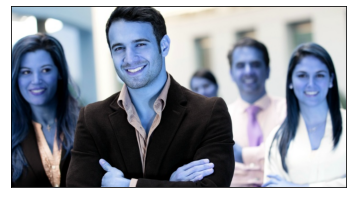

In [13]:
import matplotlib.pyplot as plt

img=cv2.imread('data/image1.jpg',cv2.IMREAD_COLOR)
b,g,r=cv2.split(img)#img파일을 b,g,r로 분리
image2=cv2.merge([r,g,b])
plt.xticks([])#x축 눈금
plt.yticks([])#y축 눈금
plt.imshow(img)
plt.show()

### 동영상 출력

In [14]:
capture = cv2.VideoCapture("data/backkpink.mp4")    #  동영상 파일에서 프레임을 받아오기

print(capture.get(cv2.CAP_PROP_POS_FRAMES))
print(capture.get(cv2.CAP_PROP_FRAME_COUNT))
while True:
    # if문을 이용하여 가장 처음 현재 프레임 개수와 총 프레임 개수를 비교
    if(capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)): 
        capture.open("data/Bee.mp4")

    ret, frame = capture.read() #ret: 카메라의 상태 저장,정상 작동: True, 미작동: False
    cv2.imshow("VideoFrame", frame)  

    if cv2.waitKey(33) > 0: break   # 33ms마다 프레임을 재생, 아무키나 누르면 break하여 while문을 종료

capture.release()
cv2.destroyAllWindows()

0.0
5931.0


### VideoCapture 멤버
- capture.get(속성) : VideoCapture의 속성을 반환합니다.
- capture.grab() : Frame의 호출 성공 유/무를 반환합니다.
- capture.isOpened() : VideoCapture의 성공 유/무를 반환합니다.
- capture.open(카메라 장치 번호 또는 경로) : 카메라나 동영상 파일을 엽니다.
- capture.release() : VideoCapture의 장치를 닫고 메모리를 해제합니다.
- capture.retrieve() : VideoCapture의 프레임과 플래그를 반환합니다.
- capture.set(속성, 값) : VideoCapture의 속성의 값을 설정합니다.

### 저장된 영상 플레이중 캡쳐 및 녹화(Capture& Record)

In [16]:
import datetime

capture=cv2.VideoCapture('./data/backkpink.mp4')
fourcc=cv2.VideoWriter_fourcc(*'DIVX')
# cv2.VideoWriter_fourcc(*'코덱'), 디지털 미디어 포맷 코드 생성(디지털 미디어 포맷 코드)
record=False#녹화 유/무 설정

while True:
    if(capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)):
        capture.open("data/Bee.mp4")

    ret, frame = capture.read()
    cv2.imshow("VideoFrame", frame)

    now = datetime.datetime.now().strftime("%d_%H-%M-%S")   # 현재 시간을 받아와 제목으로 사용
    key = cv2.waitKey(33)    # 33ms마다 갱신

    if key == 27:    # 눌러진 키의 값을 판단, 27 = ESC, 26 = Ctrl + Z, 3 = Ctrl + C, 24 = Ctrl + X,
        break
    elif key == 26:  # cv2.imwrite("경로 및 제목", 이미지)를 이용하여 해당 이미지를 저장
        print("캡쳐")
        cv2.imwrite("data/cap/" + str(now) + ".png", frame)
    elif key == 3:
        print("녹화 시작")   # video에 녹화할 파일 형식을 설정
        record = True
        video = cv2.VideoWriter("data/mov/" + str(now) + ".avi", fourcc, 20.0, (frame.shape[1], frame.shape[0]))
        # cv2.VideoWriter("경로 및 제목", 비디오 포맷 코드, FPS, (녹화 파일 너비, 녹화 파일 높이))
    elif key == 24:   # video.release()를 사용하여 메모리를 해제
        print("녹화 중지")
        record = False
        video.release()
        
    if record == True:
        print("녹화 중..")
        video.write(frame)

capture.release()
cv2.destroyAllWindows()

캡쳐
녹화 시작
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중..
녹화 중

### 웹캠 영상 저장하기

In [2]:
import datetime
import cv2

capture=cv2.VideoCapture(0)
now=datetime.datetime.now().strftime("%d_%H-%M-%S")

fourcc=cv2.VideoWriter_fourcc(*'DIVX')

video=cv2.VideoWriter("data/mov/"+str(now)+"_cap.mp4",fourcc,25.0,(640,640))


while (capture.isOpened()):
    ret,frame=capture.read()
    
    if ret:
        #이미지 반전, 0:상하, 1: 좌우
        frame=cv2.flip(frame,1)
        
        video.write(frame)
        
        cv2.imshow('frame',frame)
        
        if cv2.waitKey(0)&0xFF==ord('q'):
            break
   
    else:
        break
capture.release()
cv2.destroyAllWindows()



In [8]:
src = cv2.imread("data/conts.png", cv2.IMREAD_COLOR)

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
binary = cv2.bitwise_not(binary)
# 윤곽선(컨투어)를 검출하는 주된 요소는 하얀색의 객체를 검출하는 것
# 따라서 배경이 검은색이며 검출하려는 물체는 하얀색의 성질을 띄게끔 변형
# 이진화 처리 후, 반전시켜 검출하려는 물체를 하얀색의 성질을 띄도록 변환

contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
# cv2.findContours(이진화 이미지, 검색 방법, 근사화 방법), 이진화 이미지에서 윤곽선(컨투어)를 검색
# 반환값으로 윤곽선, 계층 구조를 반환
# 윤곽선은 Numpy 구조의 배열로 검출된 윤곽선의 지점들이 담김
# 계층 구조는 윤곽선의 계층 구조를 의미(각 윤곽선에 해당하는 속성 정보들)

for i in range(len(contours)):   # 윤곽선의 계층 구조를 표시
    cv2.drawContours(src, [contours[i]], 0, (0, 0, 255), 2)
    cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
    print( hierarchy[0][i]) #[다음 윤곽선, 이전 윤곽선, 내곽 윤곽선, 외곽 윤곽선]
    cv2.imshow("src", src)
    cv2.waitKey(0)

cv2.destroyAllWindows()

[ 2 -1  1 -1]
[-1 -1 -1  0]
[ 4  0  3 -1]
[-1 -1 -1  2]
[ 6  2  5 -1]
[-1 -1 -1  4]
[ 8  4  7 -1]
[-1 -1 -1  6]
[ 9  6 -1 -1]
[10  8 -1 -1]
[11  9 -1 -1]
[-1 10 -1 -1]
